In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

     - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
     - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
     - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
     - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
 
 
2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

     - Use a 2 sigma decision rule to isolate the outliers.
     - Do these make sense?
     - Should certain outliers be kept or removed?
 

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [2]:
# acquire my data
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


## 1.  Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multipliers of 1.5 and 3. 

## Do these lower outliers make sense?Which outliers should be kept?

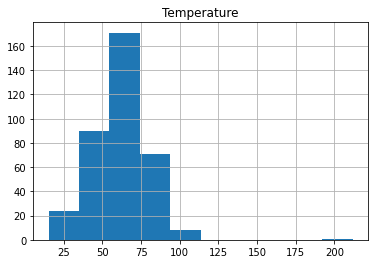

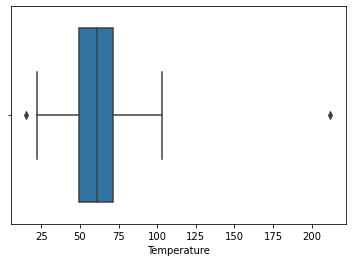

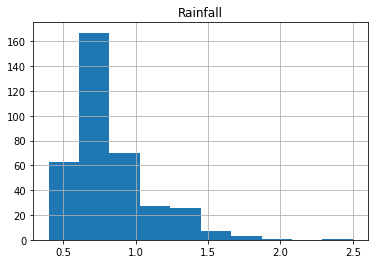

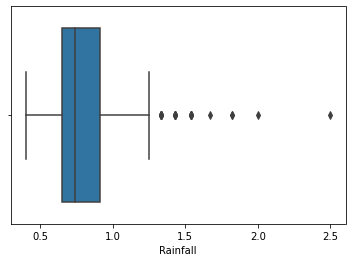

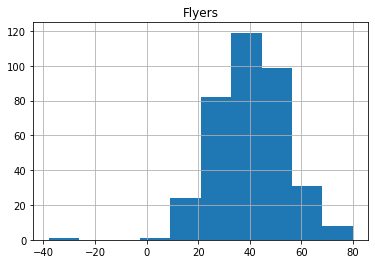

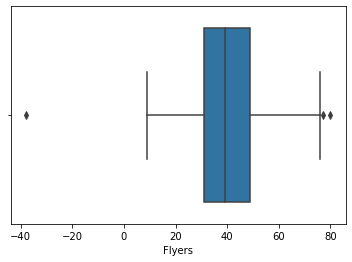

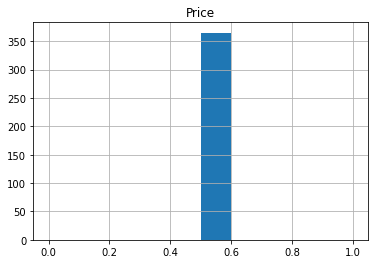

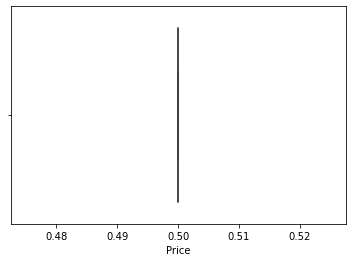

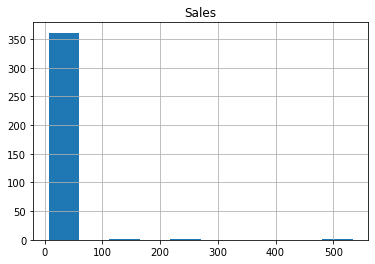

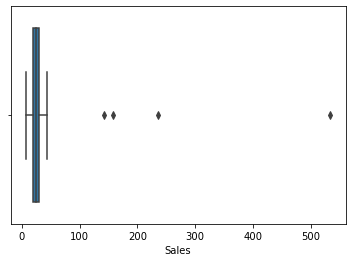

In [4]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

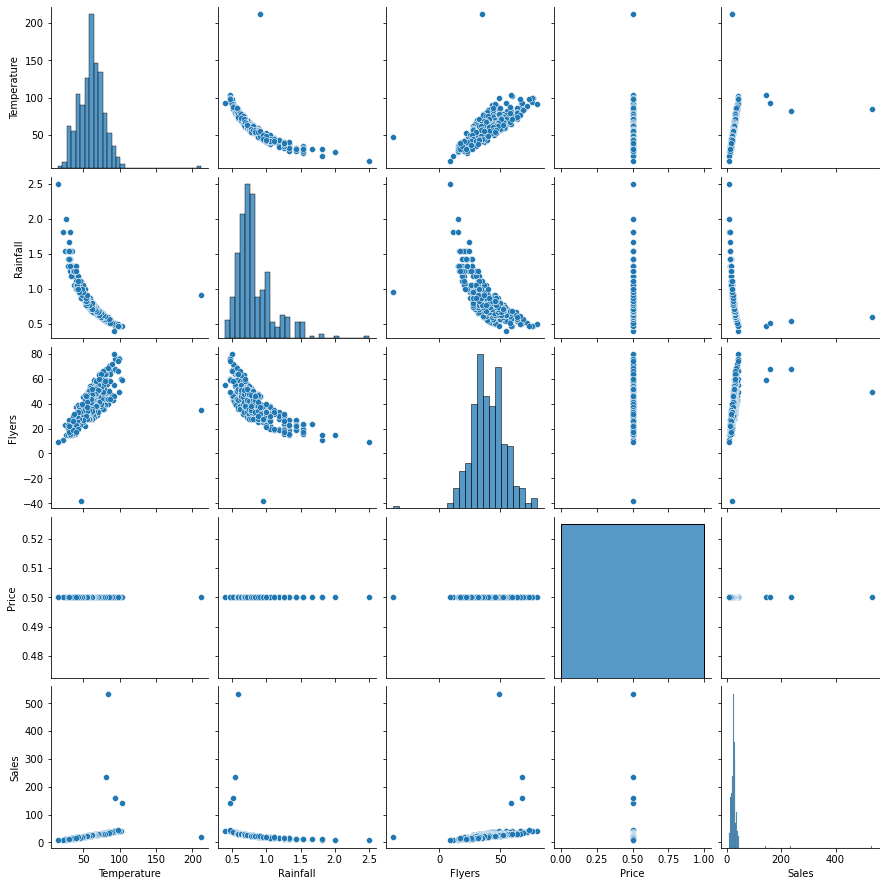

In [5]:
sns.pairplot(df);

In [6]:
df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

In [99]:
def get_lower_and_upper_bounds(df, k=1.5):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    note: recommended k be 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print('------------------------------------------------------')
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            outliers_lower = df[df[i] < lower_bound]
            outliers_upper = df[df[i] > upper_bound]
            outliers = pd.concat([outliers_lower, outliers_upper], axis=0)
            print('')
            print(outliers,'\n')
        
        
        
def visualize_get_lower_and_upper_bounds(df, k=1.5):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    note: recommended k be 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print('------------------------------------------------------------------------------')
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            outliers_lower = df[df[i] < lower_bound]
            outliers_upper = df[df[i] > upper_bound]
            outliers = pd.concat([outliers_lower, outliers_upper], axis=0)
            print('')
            print(outliers,'\n')
            
            # get those visualizations going
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = df[i], kde=True)
            plt.title(i)
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[i], data=df, whis=k)
            plt.title(i)
            plt.show()

In [100]:
get_lower_and_upper_bounds(df, k=1.5)

------------------------------------------------------
For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21 

------------------------------------------------------
For Rainfall the lower bound is 0.26 and  upper bound is 1.3

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33 

### **Takeaway**
- All the upper and lower bounds (using k=1.5 for the multiplier) for the columns make sense and align with real life expectations with the exception of temperature and rainfall since we need more domain knowledge.

------------------------------------------------------------------------------
For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21 



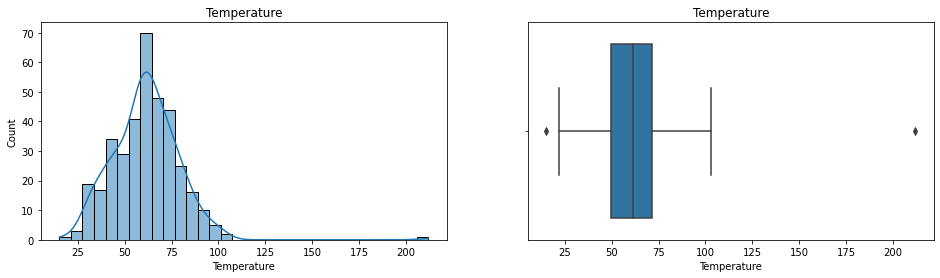

------------------------------------------------------------------------------
For Rainfall the lower bound is 0.26 and  upper bound is 1.3

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43      20    0.5     12
23    1/24/17    Tu

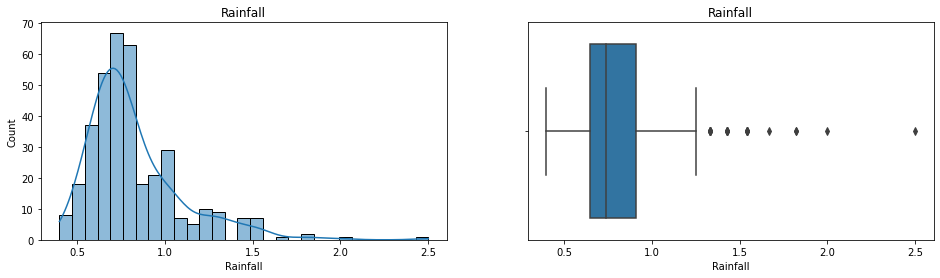

------------------------------------------------------------------------------
For Flyers the lower bound is 4.0 and  upper bound is 76.0

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
166   6/16/17   Friday         99.3      0.47      77    0.5     41
194   7/14/17   Friday         92.0      0.50      80    0.5     40 



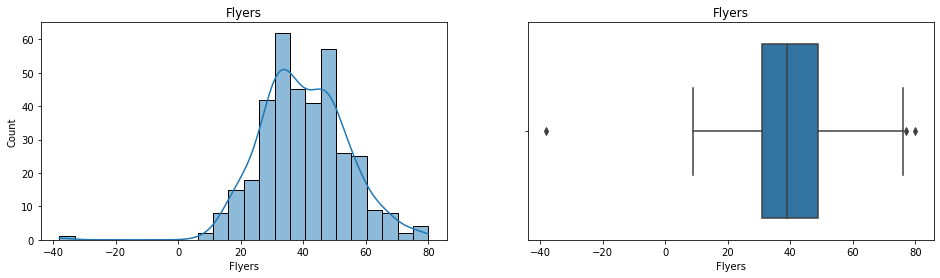

------------------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 



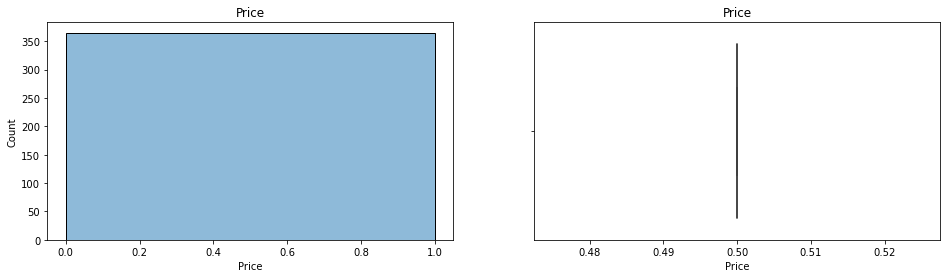

------------------------------------------------------------------------------
For Sales the lower bound is 5.0 and  upper bound is 45.0

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534 



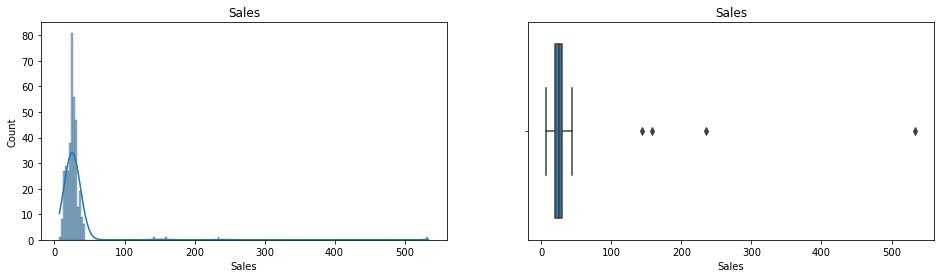

In [101]:
visualize_get_lower_and_upper_bounds(df, k=1.5)

In [10]:
get_lower_and_upper_bounds(df, k=3)

For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7
For Rainfall the lower bound is -0.13 and  upper bound is 1.69
For Flyers the lower bound is -23.0 and  upper bound is 103.0
For Price the lower bound is 0.5 and  upper bound is 0.5
For Sales the lower bound is -10.0 and  upper bound is 60.0



### **Takeaway**
- Using the multiplier of 3, the upper and lower bounds start to get a bit skewed and don't make sense.
- There are a few columns where negative bounds aren't a possibility such as flyers and sales.

For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7


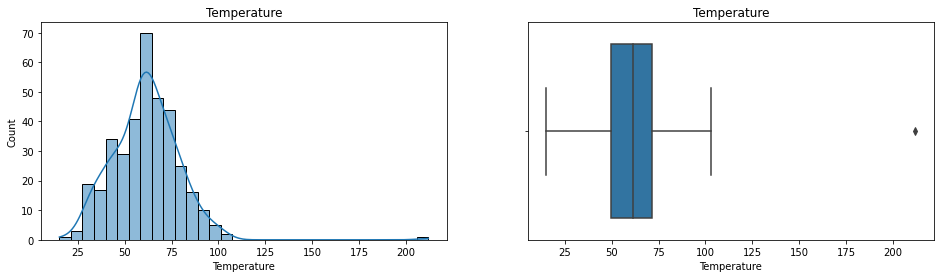

For Rainfall the lower bound is -0.13 and  upper bound is 1.69


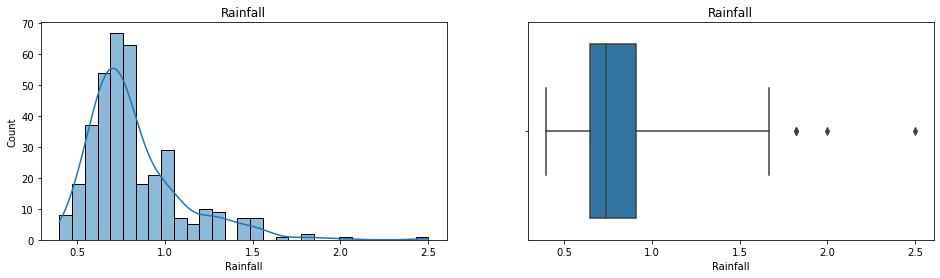

For Flyers the lower bound is -23.0 and  upper bound is 103.0


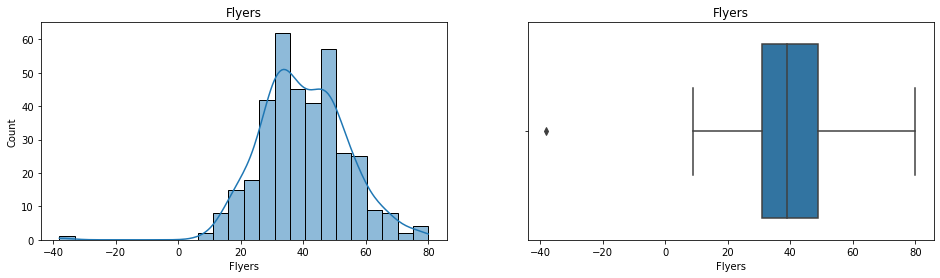

For Price the lower bound is 0.5 and  upper bound is 0.5


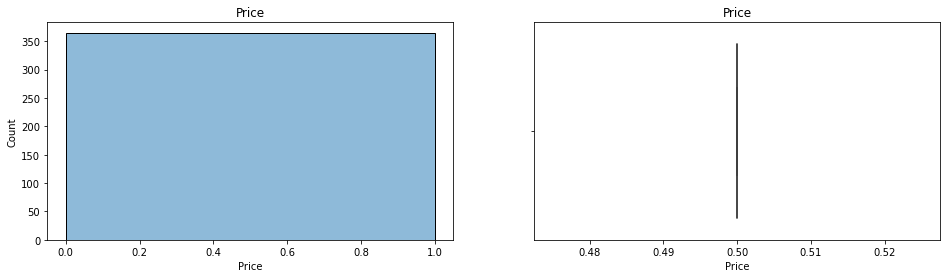

For Sales the lower bound is -10.0 and  upper bound is 60.0


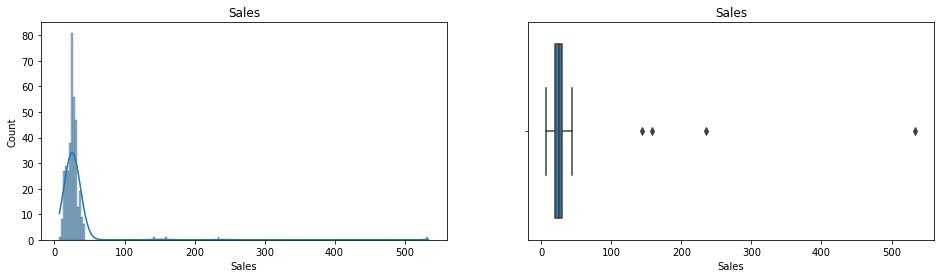

In [11]:
visualize_get_lower_and_upper_bounds(df, k=3)

**Using IQR**


Takeaways:
 - The lower bounds and upper bounds for each column make sense based of using 1.5 multiplier.
 - Using multiplier of 3 starts to give innacurate values for upper and lower bounds

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

##    - Use a 2 sigma decision rule to isolate the outliers.
##    - Do these make sense?
##    - Should certain outliers be kept or removed?

In [14]:
def hist(df):
    '''
    This function takes in a dataframe and columns and creates a histogram with each column
    '''
    for col in df.columns:
        plt.hist(df[col])
        plt.title(f"{col} distribution")
        plt.show()

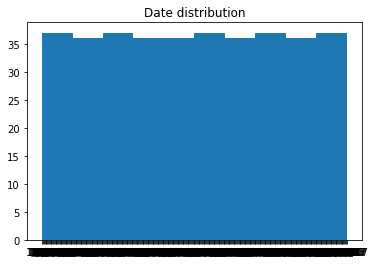

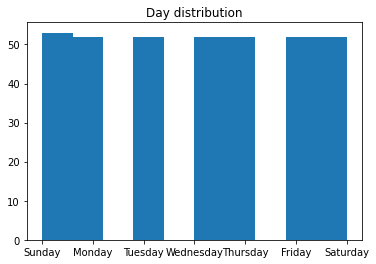

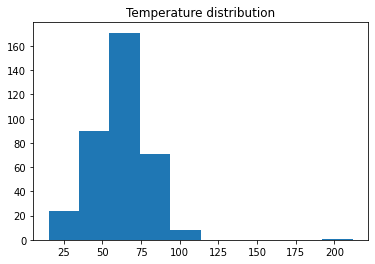

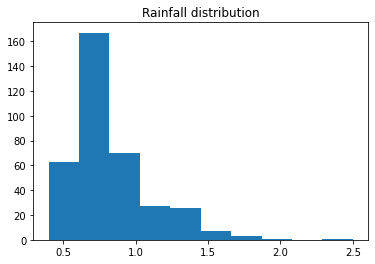

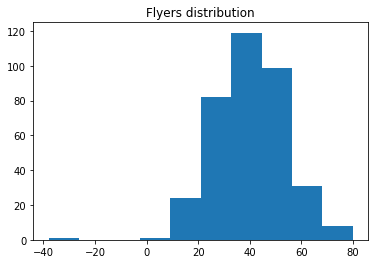

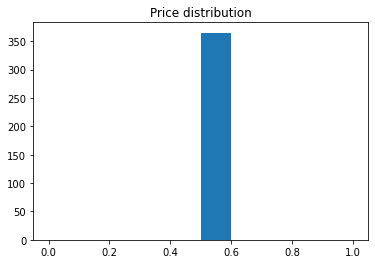

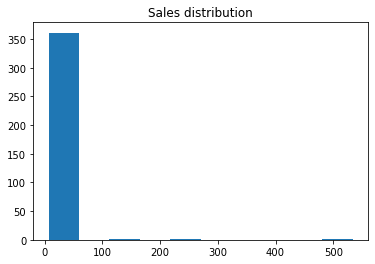

In [15]:
hist(df)

In [16]:
# pinpoint my normally distributed data
df[['Flyers', 'Temperature', 'Rainfall']].head()

,Flyers,Temperature,Rainfall
0,15,27.0,2.00
1,15,28.9,1.33
2,27,34.5,1.33
3,28,44.1,1.05
4,33,42.4,1.00


In [17]:
# the hand by hand version
# z_scores = pd.Series((df['Flyers'] - df['Flyers'].mean()) / 
#                      df['Flyers'].std())

# df['flyers_zs'] = z_scores

# df[df.flyers_zs.abs() >= 2]

In [18]:
df[pd.Series(stats.zscore(df.Flyers)).abs()>2].sort_values(by='Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
204,7/24/17,Monday,83.5,0.57,69,0.5,35
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41


### **Takeaway**
- It's obvious a lot of these are outliers. Negative values like -38 flyers is not possible. 
- However because we are only looking at flyers, it's possible there were days that 60 or more were posted. It's hard to say whether these should be taken out or not.

In [19]:
df[pd.Series(stats.zscore(df.Temperature)).abs()>2].sort_values(by='Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
190,7/10/17,Monday,98.0,0.49,66,0.5,40
166,6/16/17,Friday,99.3,0.47,77,0.5,41
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


### **Takeaway**
- Considering the distribution of temperature, we definitely have some outliers.
- A temperature of 212 is not even possible so that would be removed
- The lower temperatures are hard to say whether they belong or not. Knowing the location would help more but at the same time, if we're selling lemonade, it's safe to say it's not being sold in below freezing temperatures. So I would remove those lower bound temperatures.

In [20]:
df[pd.Series(stats.zscore(df.Rainfall)).abs()>2].sort_values(by='Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
359,12/26/17,Tuesday,28.9,1.43,23,0.5,13
351,12/18/17,Monday,30.9,1.43,27,0.5,13
346,12/13/17,Wednesday,32.2,1.43,26,0.5,14
342,12/9/17,Saturday,31.2,1.43,19,0.5,14
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
347,12/14/17,Thursday,31.9,1.54,24,0.5,13
337,12/4/17,Monday,34.9,1.54,16,0.5,13
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12


### **Takeaway**
- Taking a look at rainfall, it's hard to tell what is considered abnormal. A lot of them are close in value and we don't know the location.
- I am note sure I would be confident in removing these since none of them are extreme.

In [21]:
# create a for loop for my normally distributed data and make a dataframe out of the results

# put it altogether
df_list2s=[]
for i in df[['Flyers', 'Temperature', 'Rainfall']]:

    df_list2s.append(df[pd.Series(stats.zscore(df[i])).abs()>2])
    
df_list2s = pd.concat([df_list2s[0], df_list2s[1], df_list2s[2]], axis=0)

In [22]:
df_list2s

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [102]:
# create a for loop for my normally distributed data and make a dataframe out of the results

# put it altogether
# create a function
def sigma_outliers(df, sigma=2):

    for i in df.columns:
        
        if df[i].dtypes != 'object':

            print(df[pd.Series(stats.zscore(df[i])).abs()>sigma].sort_values(by=i))
            print('----------------------------------------')


In [104]:
sigma_outliers(df, sigma=2)

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10
207   7/27/17  Thursday         97.9      0.47      74    0.5     43
190   7/10/17    Monday         98.0      0.49      66    0.5     40
166   6/16/17    Friday         99.3      0.47      77    0.5     41
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41
202   7/22/17  Saturday         99.6      0.47      49    0.5     42
176   6/26/17    Monday        102.6      0.47      60    0.5     42
181    7/1/17  Saturday        102.9      0.47      59    0.5    143
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
----------------------------------------
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
359  12/26/17    Tuesday         28.9      1.43      23    0.5     13
351  12/18/17     Monday         30.9      1.43      27    0

**Now analyzing 3 sigma**

In [24]:
df[pd.Series(stats.zscore(df.Temperature)).abs()>3].sort_values(by='Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


### **Takeaway**
- This one here isolates the definitely temperature anomaly and makes sense.

In [25]:
df[pd.Series(stats.zscore(df.Flyers)).abs()>3].sort_values(by='Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


### **Takeaway**
- Again this one isolates the one obvious anomaly here so so far 3 sigma seems to be a bit more accurate

In [26]:
df[pd.Series(stats.zscore(df.Rainfall)).abs()>3].sort_values(by='Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


### **Takeaway**
- Again without knowing more domain knowledge, it's hard to know whether these may be anomalies or not.
- They also all fall within December and January which can be considered the rainy/cold season depending on the lcoation.

**Extra**

In [34]:
def get_sigma_percent(df, col, step=1):
    return len(df.loc[(df[col] < df[col].mean() + (df[col].std()) * step) & (df[col] > df[col].mean() - (df[col].std()) * step)]) / len(df)

In [36]:
get_sigma_percent(df, 'Flyers', step=1)

0.7095890410958904